In [1]:
##STEP35_01
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#1
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
n_sample = 6000
x_train = x_train[:n_sample]
y_train = y_train[:n_sample]

In [4]:
#2: normalize images
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

In [5]:
#3: one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

188/188 - 0s - loss: 1.7896e-05 - accuracy: 1.0000 - 447ms/epoch - 2ms/step
313/313 - 0s - loss: 0.3496 - accuracy: 0.9487 - 497ms/epoch - 2ms/step


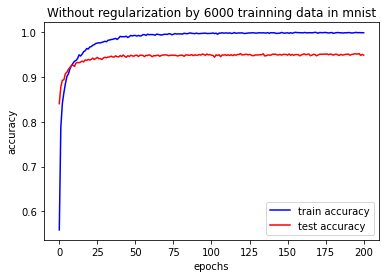

In [6]:
#4: build a model
act = 'relu'
init = "he_uniform"
n = 100   # 은닉 층 히든 유닛 수 =100
dropout_rate = 0.2   # 드랍아웃 비율 0.2
model = tf.keras.Sequential()
# Input이미지 사이즈 =28*28
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) 

model.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer = init))
model.add(tf.keras.layers.Dropout(rate=dropout_rate))

model.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer = init))
model.add(tf.keras.layers.Dropout(rate=dropout_rate))

# 마지막 층 활성화 함수 = 소프트맥스
model.add(tf.keras.layers.Dense(units=10, activation = 'softmax'))
# model.summary()

# 4-1
opt = 'rmsprop'
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# 4-2: train and evaluate the model
ret= model.fit(x_train, y_train, epochs = 201, batch_size = 400,
               validation_data = (x_test, y_test), verbose=0)
train_loss, train_acc = model.evaluate(x_train, y_train, verbose = 2)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 2)

# 4-3: plot accuracies
plt.title("Without regularization by %s trainning data in mnist"%n_sample)
plt.plot(ret.history['accuracy'], "b-", label = "train accuracy")
plt.plot(ret.history['val_accuracy'], "r-", label = "test accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc = "best")
plt.show()


In [7]:
#5: build a model with weight regularization
reg = tf.keras.regularizers.l2(0.01)
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Flatten(input_shape = (28, 28)))
model2.add(tf.keras.layers.Dense(units = n, activation = act, kernel_initializer = init, kernel_regularizer = reg))
model2.add(tf.keras.layers.Dense(units = n, activation = act, kernel_initializer = init, kernel_regularizer = reg))
model2.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))

188/188 - 1s - loss: 0.3145 - accuracy: 0.9482 - 514ms/epoch - 3ms/step
313/313 - 1s - loss: 0.4464 - accuracy: 0.9074 - 569ms/epoch - 2ms/step


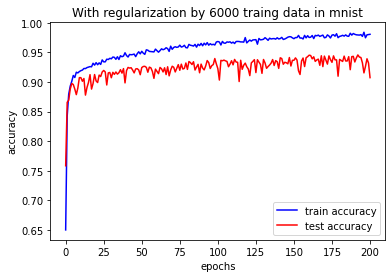

In [8]:
#5-1:cnofigure the model for training
model2.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics =['accuracy'])

#5-2: train and evaluate the model
ret2 = model2.fit(x_train, y_train, epochs = 201, batch_size = 400, validation_data =(x_test, y_test), verbose=0)
train_loss2, train_acc2 = model2.evaluate(x_train, y_train, verbose = 2)
test_loss2, test_acc2 = model2.evaluate(x_test, y_test, verbose=2)

#5-3: plot accuracy
plt.title("With regularization by %s traing data in mnist"%n_sample)
plt.plot(ret2.history['accuracy'], "b-", label = "train accuracy")
plt.plot(ret2.history['val_accuracy'], "r-", label = "test accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc = "best")
plt.show()
